## Library

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import pandas as pd
from tqdm import tqdm
import os

## Load model dan tokenizer

In [ ]:
MODEL = "Aardiiiiy/indobertweet-base-Indonesian-sentiment-analysis"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

id2label = {0: 'negatif', 1: 'netral', 2: 'positif'}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/994 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

## Fungsi untuk prediksi sentimen

In [ ]:
def get_sentiment(text):
    inputs = tokenizer(str(text), return_tensors="pt", truncation=True, max_length=256)
    with torch.no_grad():
        logits = model(**inputs).logits
    predicted_class_id = logits.argmax().item()
    return id2label[predicted_class_id]

## Read Data

In [ ]:
# Nama file input (ubah sesuai kebutuhan)
input_file = "tweets_pelayanan_Indomaret_Cleansing.csv"  # atau "dataset.csv"

# Baca file sesuai ekstensi
file_ext = os.path.splitext(input_file)[1].lower()
if file_ext == '.xlsx':
    df = pd.read_excel(input_file)
elif file_ext == '.csv':
    df = pd.read_csv(input_file)
else:
    raise ValueError("Format file tidak dikenali. Gunakan file .xlsx atau .csv")

# Validasi kolom
if 'full_text' not in df.columns:
    raise ValueError(f"Kolom 'full_text' tidak ditemukan. Kolom yang tersedia: {df.columns.tolist()}")

## Prediksi sentimen

In [ ]:
df["sentiment"] = [get_sentiment(t) for t in tqdm(df["full_text"])]

100%|██████████| 294/294 [01:45<00:00,  2.79it/s]


## Simpan hasil

In [ ]:
output_file = f"{os.path.splitext(input_file)[0]}_labeled.csv"
df['minimarket'] = 'indomaret'  # Menambahkan kolom minimarket dengan nilai 'alfamart'
df[['full_text', 'clean_tweet', 'sentiment','minimarket']].rename(columns={'clean_tweet': 'text'}).to_csv(output_file, index=False)
print(f"Hasil disimpan ke: {output_file}")

Hasil disimpan ke: tweets_pelayanan_Indomaret_Cleansing_labeled.csv


## Analisis distribusi sentimen

In [ ]:
# Hitung jumlah tiap kategori sentimen
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
netral     153
negatif     91
positif     50
Name: count, dtype: int64


## Visualisasi distribusi sentimen dengan barplot

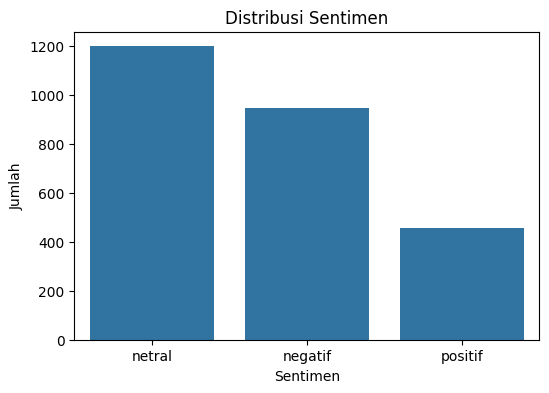

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title("Distribusi Sentimen")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

## Visualisasi distribusi sentimen dengan pie chart

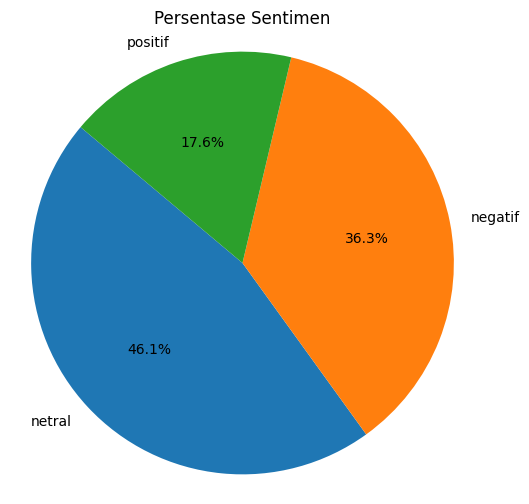

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Persentase Sentimen")
plt.axis('equal')
plt.show()

## Load dataset baru

In [ ]:
# Load dataset Alfamart dan tambahkan kolom 'minimarket' dengan nilai 'Alfamart'
df_alfamart = pd.read_csv("tweets_pelayanan_Alfamart_Cleansing_labeled.csv")
df_alfamart['minimarket'] = 'Alfamart'

# Load dataset Indomaret dan tambahkan kolom 'minimarket' dengan nilai 'Indomaret'
df_indomaret = pd.read_csv("tweets_pelayanan_Indomaret_Cleansing_labeled.csv")
df_indomaret['minimarket'] = 'Indomaret'

## Gabungkan kedua dataframe

In [ ]:
df_combined = pd.concat([df_alfamart, df_indomaret], ignore_index=True)
print(f"Jumlah data gabungan: {len(df_combined)}")

Jumlah data gabungan: 499


## Simpan hasil gabungan ke file baru

In [ ]:
df_combined.to_csv("tweets_pelayanan_gabungan.csv", index=False)
print("Data gabungan berhasil disimpan ke 'tweets_pelayanan_gabungan.csv'")

Data gabungan berhasil disimpan ke 'tweets_pelayanan_gabungan.csv'
